In [ ]:
import os, sys
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath('..'))
from rlrom import utils
from rlrom.plots import plot_training_logs
from pprint import pprint

CFG_FILE = 'cfg_main.yml'
cfg = utils.load_cfg(CFG_FILE)
cfg_train = cfg.get("cfg_train")
tb_logs_folder =  cfg_train.get('tb_logs','./tb_logs')
model_name = cfg_train.get('model_name')
pprint(lf)


/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


pygame 2.6.1 (SDL 2.28.4, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


2025-06-23 09:21:19.364059: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-23 09:21:19.371285: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-23 09:21:19.379604: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-23 09:21:19.382184: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-23 09:21:19.388645: I tensorflow/core/platform/cpu_feature_guar

loading field [ cfg_env ] from file [ cfg_env.yml ]
loading field [ cfg_train ] from file [ cfg_train.yml ]
loading field [ cfg_specs ] from file [ cfg_specs.yml ]
['./tb_logs/test_ppo_no_stl_1750613481_1',
 './tb_logs/test_ppo_no_stl_1750616402_1',
 './tb_logs/test_ppo_no_stl_1750614828_1',
 './tb_logs/test_ppo_no_stl_1750625642_1',
 './tb_logs/test_ppo_no_stl_1750624674_1']


In [ ]:
model_name1= 'test_ppo_no_stl'
model_name2= 'test_ppo_safe0'

lf = utils.list_folders(os.path.join(tb_logs_folder), model_name)
all_data = utils.tb_extract_from_tag(lf, 'eval/mean_final_dist')



<Axes: xlabel='Training Steps', ylabel='Average cumulated reward'>

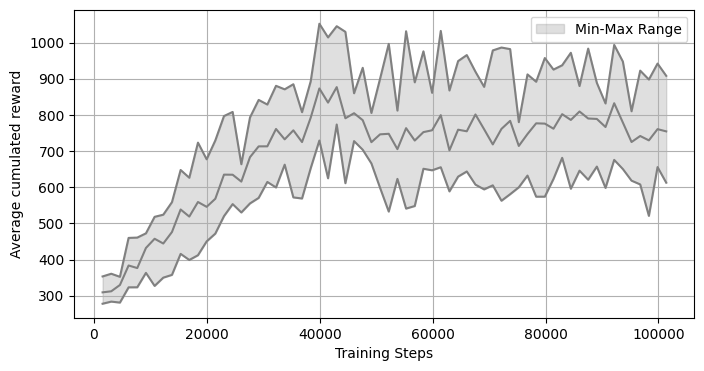

In [ ]:
ax = plot_training_logs(all_data1, label= 'no_stl')
plot_training_logs(all_data2, label='safe0', color='green')